# IPRO 497-414
Let's start by trying to compile some aggregates on the data we currently possess.

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import scipy.stats as stats 
import numpy as np 
import statsmodels.api as sm 
import statsmodels.nonparametric as snp 
import statsmodels.stats as sms 
import scipy.linalg as lg 
import plotly as pty
from pprint import pprint

In [2]:
clean_arc_data = pd.read_csv('clean_arc_data(1_1_14-8_31_18).csv')
arc_responses = clean_arc_data.dropna(axis = 0,  how = 'all', subset = ['responders_identified'], inplace = False)
arc_responses.address = map(lambda x: x.upper(), arc_responses.address)
arc_responses.incident_verified = arc_responses[['incident_verified', 'address']].drop_duplicates(keep = False, inplace = False)
print len(arc_responses)
arc_responses.head(10)

5906


C:\Users\debro\Anaconda2\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,case,date,incident_number,incident_type,incident_call_type,cas_event_number,status,address,city,state,...,num_people_deceased,num_adults,num_children,num_families,assistance_given,incident_verified,dispatch_relayed,responders_identified,dat_on_scene,dat_departed_scene
0,1,1/1/2014,14-0533,fire,hot,1-1F69GF,closed,1348 W HOWARD ST,CHICAGO,IL,...,0.0,10.0,8.0,5.0,NaN,1/1/2014 7:00,1/1/2014 8:00,1/1/2014 8:08,1/1/2014 9:08,1/2/2014 1:45
1,2,1/1/2014,14-0534,police,hot,NaN,closed,604 SIBLEY AVE.,CALUMET CITY,IL,...,0.0,1.0,0.0,1.0,NaN,1/1/2014 14:25,1/1/2014 14:30,1/1/2014 15:20,1/1/2014 16:00,1/1/2014 16:00
2,3,1/1/2014,14-0535,fire,hot,1-1F6ATB,closed,18405 REGAL ROAD,HOMEWOOD,IL,...,0.0,4.0,0.0,1.0,NaN,1/1/2014 16:05,1/1/2014 16:20,12/30/2014 20:13,1/1/2014 17:30,1/1/2014 18:10
3,4,1/1/2014,14-0536,fire,hot,1-1F6ATV,closed,4323 SOUTH DEARBORN,CHICAGO,IL,...,0.0,2.0,0.0,1.0,NaN,1/1/2014 21:10,1/1/2014 21:15,1/1/2014 21:50,1/1/2014 22:59,1/1/2014 23:51
4,5,1/2/2014,14-0537,fire,hot,1-1F6AT5,closed,1457 WOODBURY CIR,GURNEE,IL,...,0.0,0.0,0.0,0.0,NaN,1/2/2014 7:40,1/2/2014 7:45,1/2/2014 8:10,1/2/2014 9:40,1/2/2014 22:15
7,8,1/2/2014,14-0540,fire,hot,1-1F76MJ,closed,131 S 9TH AVE,MAYWOOD,IL,...,0.0,2.0,6.0,1.0,NaN,1/2/2014 22:45,1/2/2014 22:59,1/2/2014 23:38,1/3/2014 0:00,1/3/2014 1:41
74,75,1/15/2014,14-0607,fire,hot,NaN,closed,3443 N HAMLIN AVE,CHICAGO,IL,...,0.0,3.0,0.0,3.0,NaN,1/15/2014 18:10,1/15/2014 18:15,1/15/2014 19:09,1/15/2014 20:02,1/15/2014 20:22
75,76,1/15/2014,14-0608,fire,hot,1-1FCFKR,closed,855 S MYRTLE AVE,KANKAKEE,IL,...,0.0,1.0,0.0,1.0,NaN,1/15/2014 22:45,1/15/2014 22:50,1/15/2014 22:55,1/15/2014 23:48,1/16/2014 0:47
76,77,1/16/2014,14-0609,fire,hot,1-1FCFJZ,closed,1106 WEST 51ST STREET,Chicago,IL,...,0.0,6.0,0.0,1.0,1162.0,1/16/2014 14:35,1/16/2014 14:45,1/16/2014 15:30,1/16/2014 16:00,1/16/2014 16:55
77,78,1/16/2014,14-0610,fire,hot,NaN,closed,11620 SOUTH YALE AVENUE,Chicago,IL,...,0.0,4.0,0.0,1.0,NaN,1/16/2014 17:24,1/16/2014 17:25,1/16/2014 17:30,1/16/2014 17:42,1/16/2014 18:08


In [3]:
#dt = np.array(arc_responses.responders_identified)
#rt = np.array(arc_responses.dat_on_scene)
# Response Times
#rts =[]
#for x in range(len(dt)):
#    dispatch_dt = dt[x]
 #   dispatch_str = dispatch_dt.split()[1]
  #  dispatch_time = pd.to_datetime(dispatch_str)
   # dispatch_time = np.datetime64(dispatch_time)d
    #respond_dt = rt[x]
    #respond_str = respond_dt.split()[1]
    #respond_time = pd.to_datetime(respond_str)
    #respond_time = np.datetime64(respond_time)
    #print respond_time
    #time_to_scene = respond_time - dispatch_time
    #rts.append(time_to_scene)

#rts[0:2]

In [4]:
print(arc_responses.case.nunique())

5906


We have 5,984 total cases.

In [5]:
incident_counts = arc_responses.groupby(['county']).incident_type.count().reset_index()
incident_counts.columns = ['county', 'incident_count']

In [6]:
incident_counts.sort_values(by = 'incident_count', ascending = False)

,county,incident_count
3,Cook,4284
15,Lake,268
26,Will,240
27,Winnebago,191
12,Kankakee,141
11,Kane,130
6,DuPage,120
14,LaSalle,94
19,McHenry,73
4,DeKalb,65


In [7]:
type_count_cc = arc_responses.groupby(['county']).case.count().reset_index()
type_count_cc.columns = [ 'county', 'number_of_incidents']
type_count_cc.sort_values(by = 'number_of_incidents', ascending = False)
print (np.sum(np.array(type_count_cc.number_of_incidents)))

5898


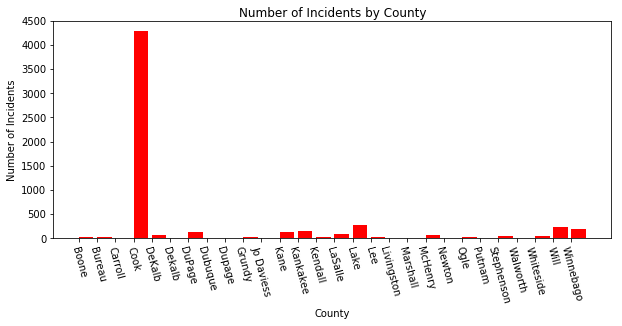

In [8]:
plt.figure(figsize = (10, 4))
ax = plt.subplot(1, 1, 1)
plt.bar(range(len(type_count_cc.county)), type_count_cc.number_of_incidents, color = 'r' )
ax.set_xticks(range(len(type_count_cc.county)))
ax.set_xticklabels(type_count_cc.county)
plt.xticks(rotation = 285)
plt.ylabel('Number of Incidents')
plt.xlabel('County')
plt.title('Number of Incidents by County')
plt.show()

This information does not really give us any really good insights, it's pretty clear that the county with the largest populations would have the highest reported amount of incidents.

Let's try something different, maybe seeing what the response rate for the ARC was.

In [9]:
arc_response = arc_responses[['date','case', 'incident_type', 'dat_on_scene']].reset_index()
arc_response['response'] = arc_response.dat_on_scene.apply(lambda x: 'Responded' if pd.notnull(x)  else 'No Reponse')
arc_response.head()
print(len(arc_response))

5906


In [10]:
incident_response = arc_response.groupby(['response', 'incident_type']).case.count().reset_index()
incident_response.columns = ['response', 'incident_type', 'count']
incident_response

,response,incident_type,count
0,No Reponse,building_collapse,9
1,No Reponse,explosion,5
2,No Reponse,fire,1341
3,No Reponse,flood,22
4,No Reponse,hazmat,8
5,No Reponse,no_response_needed,2
6,No Reponse,not_eligible_for_services,3
7,No Reponse,storm,9
8,No Reponse,transportation,3
9,No Reponse,vacate,7


C:\Users\debro\Anaconda2\lib\site-packages\matplotlib\legend.py:326: UserWarning:

Unrecognized location "left center". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center




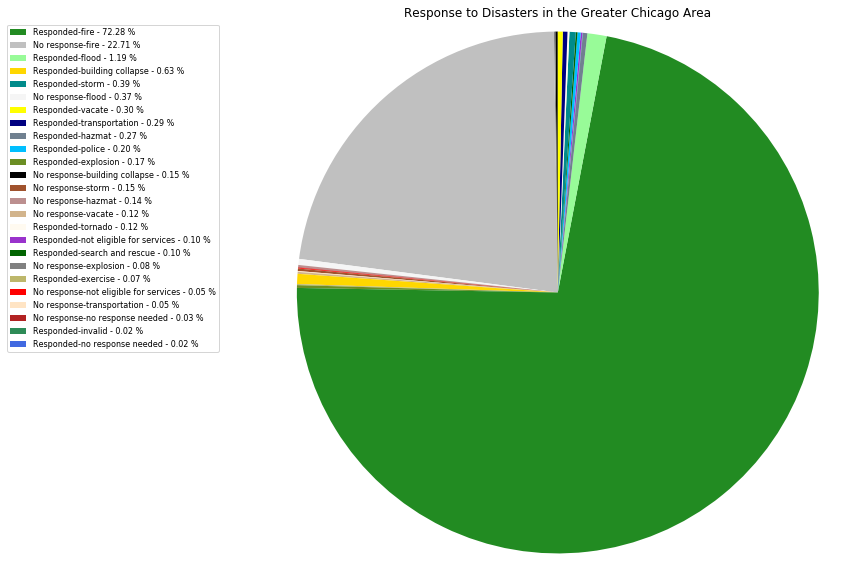

In [11]:
y = incident_response['count'].astype(float)
percent = 100. * y / y.sum()

plt.figure(figsize = (10,10))
ax = plt.subplot(1, 1, 1)
plt.axis('equal')

colors = ['black', 'gray', 'silver', 'whitesmoke', 'rosybrown', 'firebrick', 'red', 'sienna', 'bisque', 'tan', 'gold',\
         'darkkhaki', 'olivedrab', 'forestgreen', 'palegreen', 'slategray', 'seagreen', 'royalblue', 'darkorchid',\
         'deepskyblue', 'darkgreen', 'darkcyan', 'floralwhite', 'navy', 'yellow']
labels_i = ['No response-building collapse', 'No response-explosion', 'No response-fire', \
                                              'No response-flood', 'No response-hazmat', 'No response-no response needed', \
                                              'No response-not eligible for services', 'No response-storm', \
                                              'No response-transportation', 'No response-vacate', \
                                              'Responded-building collapse', 'Responded-exercise', 'Responded-explosion', \
                                              'Responded-fire', 'Responded-flood', 'Responded-hazmat', 'Responded-invalid',\
                                              'Responded-no response needed', 'Responded-not eligible for services',\
                                              'Responded-police', 'Responded-search and rescue', 'Responded-storm',\
                                              'Responded-tornado', 'Responded-transportation', 'Responded-vacate']
patches, texts = plt.pie(incident_response['count'], colors=colors, startangle=90, radius = 1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels_i, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda labels_i: labels_i[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.title('Response to Disasters in the Greater Chicago Area')
plt.savefig('response_to_disasters.png', bbox_inches = 'tight')
plt.show()

This is just a basic Pie chart that lists the percentages of the types of events the ARC has reported in their system, and whether or not they went to the scene of the incident.

In [12]:
incident_response_i = arc_response.groupby(['response']).case.count().reset_index()
incident_response_i.columns = ['response', 'count']
incident_response_i

,response,count
0,No Reponse,1409
1,Responded,4497


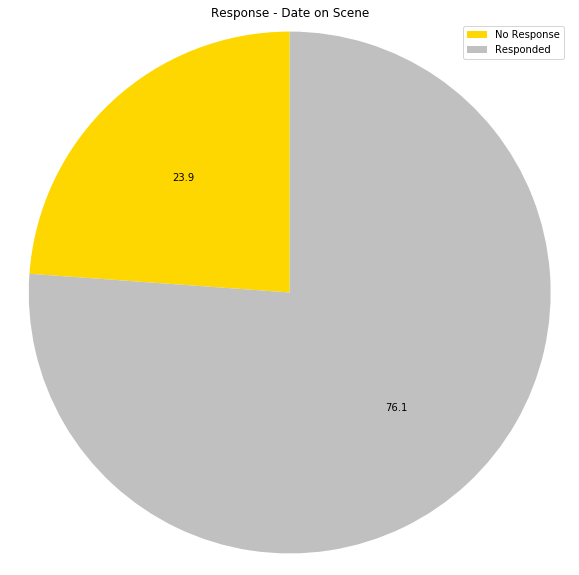

In [13]:
y = incident_response['count'].astype(float)
percent = 100. * y / y.sum()

plt.figure(figsize = (10,10))
ax = plt.subplot(1, 1, 1)
plt.axis('equal')
labels = ['No Response', 'Responded']
colors = ['gold', 'silver']
plt.pie(incident_response_i['count'], colors=colors, autopct = '%.1f', startangle=90, radius = 1.2)
plt.legend(labels)
plt.title('Response - Date on Scene')
plt.show()

In [14]:
fire_plans = pd.read_csv('Copy of ARC.HFPC (1).csv')
fire_plans.head(10)

,Unnamed: 0,Client.ID,Address,Unit,City,State,ZipCode,County,Visit.Date,Entry.Date,...,Escape.Plans,Safety.Checklist,Hazard.Education,Hazard.Type,People.Served,Youth.Served,Seniors.Served,Vets.Served,Disabled.Served,Unnamed: 25
0,1.0,19343306.0,1355 N Arthur Burch Dr,2,BOURBONNAIS,IL,60914.0,Kankakee,8/15/2014,12/29/2014,...,1.0,0.0,0.0,None,3,0,0,0,0,NaN
1,2.0,19343333.0,1475 N Arthur Burch Dr,5,BOURBONNAIS,IL,60914.0,Kankakee,8/15/2014,12/29/2014,...,1.0,0.0,0.0,None,3,0,0,0,0,NaN
2,3.0,19343207.0,1168 S 5th Ave,NaN,KANKAKEE,IL,60901.0,Kankakee,8/15/2014,12/29/2014,...,1.0,0.0,0.0,None,3,0,0,0,0,NaN
3,4.0,19343405.0,1256 Westview Dr,NaN,KANKAKEE,IL,60901.0,Kankakee,8/15/2014,12/29/2014,...,1.0,0.0,0.0,None,3,0,0,0,0,NaN
4,5.0,19343380.0,1645 E Eagle St,NaN,KANKAKEE,IL,60901.0,Kankakee,8/15/2014,12/29/2014,...,1.0,0.0,0.0,None,3,0,0,0,0,NaN
5,6.0,19343149.0,1853 Greenview Ave,NaN,KANKAKEE,IL,60901.0,Kankakee,8/15/2014,12/29/2014,...,1.0,0.0,0.0,None,3,0,0,0,0,NaN
6,7.0,19343166.0,1879 Sunnyside Ave,NaN,KANKAKEE,IL,60901.0,Kankakee,8/15/2014,12/29/2014,...,1.0,0.0,0.0,None,3,0,0,0,0,NaN
7,8.0,19343296.0,305 S Gordon Ave,NaN,KANKAKEE,IL,60901.0,Kankakee,8/15/2014,12/29/2014,...,1.0,0.0,0.0,None,3,0,0,0,0,NaN
8,9.0,19343351.0,318 Albert Blvd,NaN,KANKAKEE,IL,60901.0,Kankakee,8/15/2014,12/29/2014,...,1.0,0.0,0.0,None,3,0,0,0,0,NaN
9,10.0,19343250.0,345 E Bourbonnais St,NaN,KANKAKEE,IL,60901.0,Kankakee,8/15/2014,12/29/2014,...,1.0,0.0,0.0,None,3,0,0,0,0,NaN


In [15]:
print(list(fire_plans.columns.values))
fire_plans.columns = ['Unnamed: 0', 'Client_ID', 'Address', 'Unit', 'City', 'State', 'ZipCode', 'County', \
                       'Visit.Date', 'Entry.Date', 'HSM', 'Alarms.Installed', 'DHH.Alarms.Installed', 'Pre.Existing.Alarms',\
                       'Alarms.Tested', 'Batteries.Replaced', 'Escape.Plans', 'Safety.Checklist', 'Hazard.Education', \
                       'Hazard.Type', 'People_Served', 'Youth.Served', 'Seniors.Served', 'Vets.Served', 'Disabled.Served', \
                       'Unnamed: 25']
#fire_plans = fire_plans.People_Served.dropna(axis = 0)

['Unnamed: 0', 'Client.ID', 'Address', 'Unit', 'City', 'State', 'ZipCode', 'County', 'Visit.Date', 'Entry.Date', 'HSM', 'Alarms.Installed', 'DHH.Alarms.Installed', 'Pre.Existing.Alarms', 'Alarms.Tested', 'Batteries.Replaced', 'Escape.Plans', 'Safety.Checklist', 'Hazard.Education', 'Hazard.Type', 'People.Served', 'Youth.Served', 'Seniors.Served', 'Vets.Served', 'Disabled.Served', 'Unnamed: 25']


In [16]:
emgy_plans = fire_plans.groupby(['County','Alarms.Installed', 'Escape.Plans', 'Safety.Checklist', 'Hazard.Education'])\
.Client_ID.count().reset_index()
emgy_plans.columns = ['County', 'Escape_Plans', 'Alarms_Installed', 'Safety_Checklist', 'Hazard_Education', 'Clients_Served']

In [17]:
emgy_plans['alarm_exist'] = emgy_plans.Alarms_Installed.apply(lambda x: 0.0 if x == 0.0 else 1.0)
emgy_plans['escape_plan_exist'] = emgy_plans.Escape_Plans.apply(lambda x: 0.0 if x == 0.0 else 1.0)
emgy_plans['Safety_Checklist'] = emgy_plans.Safety_Checklist.apply(lambda x: 0.0 if x == 0.0 else 1.0)
emgy_plans['Hazard_Education'] = emgy_plans.Hazard_Education.apply(lambda x: 0.0 if x == 0.0 else 1.0)
emgy_plans.head()

,County,Escape_Plans,Alarms_Installed,Safety_Checklist,Hazard_Education,Clients_Served,alarm_exist,escape_plan_exist
0,Boone,1.0,1.0,1.0,0.0,13,1.0,1.0
1,Boone,1.0,1.0,1.0,1.0,5,1.0,1.0
2,Boone,2.0,1.0,1.0,0.0,15,1.0,1.0
3,Boone,2.0,1.0,1.0,1.0,2,1.0,1.0
4,Boone,3.0,1.0,1.0,0.0,7,1.0,1.0


In [18]:
#Making Data Frame Showing Preparedness of Each Client
client_prep = pd.DataFrame()
client_prep['county'] = emgy_plans.County
client_prep['county'] = map(lambda x: x.upper(), client_prep['county'])
client_prep['alarm_exist'] = emgy_plans.alarm_exist
client_prep['escape_plan'] = emgy_plans.escape_plan_exist
client_prep['hazard_education'] = emgy_plans.Hazard_Education
client_prep['safety_checklist'] = emgy_plans.Safety_Checklist
col_list = list(client_prep)
client_prep['score'] = client_prep[col_list].sum(axis = 1)

client_prep.head()

,county,alarm_exist,escape_plan,hazard_education,safety_checklist,score
0,BOONE,1.0,1.0,0.0,1.0,3.0
1,BOONE,1.0,1.0,1.0,1.0,4.0
2,BOONE,1.0,1.0,0.0,1.0,3.0
3,BOONE,1.0,1.0,1.0,1.0,4.0
4,BOONE,1.0,1.0,0.0,1.0,3.0


In [19]:
client_prep['clients_served'] = emgy_plans.Clients_Served
bool_prep = pd.DataFrame()
bool_prep['county'] = emgy_plans.County
bool_prep['county'] = map(lambda x: x.upper(), client_prep['county'])
bool_prep['alarm_exist'] = emgy_plans.Alarms_Installed.apply(lambda x: False if x == 0.0 else True)
bool_prep['escape_plan_exist'] = emgy_plans.Escape_Plans.apply(lambda x: False if x == 0.0 else True)
bool_prep['safety_checklist'] = emgy_plans.Safety_Checklist.apply(lambda x: False if x == 0.0 else True)
bool_prep['hazard_education'] = emgy_plans.Hazard_Education.apply(lambda x: False if x == 0.0 else True)
bool_prep['clients_served'] = client_prep.clients_served
cp = []
for x in range(len(client_prep.county)):
    if ((bool_prep.hazard_education[x] == False) and 
        (bool_prep.safety_checklist[x] == False) and
        (bool_prep.alarm_exist[x] == False) and 
        (bool_prep.escape_plan_exist[x] == False)):
        y = 'No Safety Precautions Taken'
        cp.append(y)
    if ((bool_prep.hazard_education[x] == True) and 
        (bool_prep.safety_checklist[x] == False) and 
        (bool_prep.alarm_exist[x] == False) and 
        (bool_prep.escape_plan_exist[x] == False)):
        y = 'Hazard Education Only'
        cp.append(y)
    if ((bool_prep.hazard_education[x] == False) and 
        (bool_prep.safety_checklist[x]) and 
        (bool_prep.alarm_exist[x] == False) and 
        (bool_prep.escape_plan_exist[x] == False)):
        y = 'Safety Checklist Only'
        cp.append(y)
    if ((bool_prep.hazard_education[x] == False) and 
        (bool_prep.safety_checklist[x] == False) and 
        (bool_prep.alarm_exist[x]) and 
        (bool_prep.escape_plan_exist[x] == False)):
        y = 'Alarm Only'
        cp.append(y)
    if ((bool_prep.hazard_education[x] == False) and 
        (bool_prep.safety_checklist[x] == False) and 
        (bool_prep.alarm_exist[x] == False) and 
        (bool_prep.escape_plan_exist[x] == True)):
        y = 'Safety Checklist Only'
        cp.append(y)
    if ((bool_prep.hazard_education[x] == True) and 
        (bool_prep.safety_checklist[x] == True) and 
        (bool_prep.alarm_exist[x] == False) and 
        (bool_prep.escape_plan_exist[x] == False)):
        y = 'Hazard Education and Safety Checklist'
        cp.append(y)
    if ((bool_prep.hazard_education[x] == True) and 
        (bool_prep.safety_checklist[x] == False) and 
        (bool_prep.alarm_exist[x] == True) and 
        (bool_prep.escape_plan_exist[x] == False)):
        y = 'Hazard Education and Alarm Exist'
        cp.append(y)
    if ((bool_prep.hazard_education[x] == True) and 
        (bool_prep.safety_checklist[x] == False) and 
        (bool_prep.alarm_exist[x] == False) and 
        (bool_prep.escape_plan_exist[x] == True)):
        y = 'Hazard Education and Escape Plan'
        cp.append(y)
    if ((bool_prep.hazard_education[x] == False) and 
        (bool_prep.safety_checklist[x] == True) and 
        (bool_prep.alarm_exist[x] == True) and 
        (bool_prep.escape_plan_exist[x] == False)):
        y = 'Safety Checklist and Alarm Exist'
        cp.append(y)
    if ((bool_prep.hazard_education[x] == False) and 
        (bool_prep.safety_checklist[x] == True) and 
        (bool_prep.alarm_exist[x] == False) and 
        (bool_prep.escape_plan_exist[x] == True)):
        y = 'Safety Checklist and Escape Plan'
        cp.append(y)
    if ((bool_prep.hazard_education[x] == False) and 
        (bool_prep.safety_checklist[x] == False) and 
        (bool_prep.alarm_exist[x] == True) and 
        (bool_prep.escape_plan_exist[x] == True)):
        y = 'Alarm Exist and Escape Plan Exist'
        cp.append(y)
    if ((bool_prep.hazard_education[x] == True) and 
        (bool_prep.safety_checklist[x] == True) and 
        (bool_prep.alarm_exist[x] == True) and 
        (bool_prep.escape_plan_exist[x] == False)):
        y = 'Hazard Education, Safety Checklist, and Alarm Exist'
        cp.append(y)
    if ((bool_prep.hazard_education[x] == True) and 
        (bool_prep.safety_checklist[x] == False) and 
        (bool_prep.alarm_exist[x] == True) and 
        (bool_prep.escape_plan_exist[x] == True)):
        y = 'Hazard_Education, Alarm Exist, and Escape Plan Exist'
        cp.append(y)
    if ((bool_prep.hazard_education[x] == False) and 
        (bool_prep.safety_checklist[x] == True) and 
        (bool_prep.alarm_exist[x] == True) and 
        (bool_prep.escape_plan_exist[x] == True)):
        y = 'Safety Checklist, Alarm Exist, and Escape Plan Exist'
        cp.append(y)
    if ((bool_prep.hazard_education[x] == True) and 
        (bool_prep.safety_checklist[x] == True) and 
        (bool_prep.alarm_exist[x] == False) and 
        (bool_prep.escape_plan_exist[x] == True)):
        y = 'Hazard Education, Safety Checklist, and Escape Plan Exist'
        cp.append(y)
    if ((bool_prep.hazard_education[x] == True) and 
        (bool_prep.safety_checklist[x] == True) and 
        (bool_prep.alarm_exist[x] == True) and 
        (bool_prep.escape_plan_exist[x] == True)):
        y = 'All Precautions Taken'
        cp.append(y)
    #else:
        #y = 'IDK'

        0#cp.append(y)



cs = ['crimson', 'orange', 'forestgreen', 'cyan', 'goldenrod', 'indianred',
     'deepskyblue', 'sienna', 'silver', 'darkslategray', 'lime', 'fuchsia']
bool_prep['prep'] = cp
safety_labels = bool_prep.prep.unique()
bool_prep.head()

,county,alarm_exist,escape_plan_exist,safety_checklist,hazard_education,clients_served,prep
0,BOONE,True,True,True,False,13,"Safety Checklist, Alarm Exist, and Escape Plan..."
1,BOONE,True,True,True,True,5,All Precautions Taken
2,BOONE,True,True,True,False,15,"Safety Checklist, Alarm Exist, and Escape Plan..."
3,BOONE,True,True,True,True,2,All Precautions Taken
4,BOONE,True,True,True,False,7,"Safety Checklist, Alarm Exist, and Escape Plan..."


In [20]:
prep = bool_prep.groupby(['prep']).clients_served.sum().reset_index()
z = prep['clients_served'].astype(float)
percent = 100. * z / np.sum(z)
prep['percent'] = percent
prep = prep.sort_values(by = 'percent', ascending = True).reset_index()
prep.columns = ['--', 'preparedness_level', 'clients_served', 'percent']
prep

,--,preparedness_level,clients_served,percent
0,2,Hazard Education and Alarm Exist,1,0.012541
1,7,No Safety Precautions Taken,2,0.025082
2,4,"Hazard Education, Safety Checklist, and Alarm ...",6,0.075245
3,3,Hazard Education and Escape Plan,45,0.564334
4,9,Safety Checklist and Alarm Exist,48,0.601956
5,5,"Hazard Education, Safety Checklist, and Escape...",51,0.639579
6,6,"Hazard_Education, Alarm Exist, and Escape Plan...",117,1.467269
7,10,Safety Checklist and Escape Plan,180,2.257336
8,0,Alarm Exist and Escape Plan Exist,255,3.197893
9,1,All Precautions Taken,827,10.371206


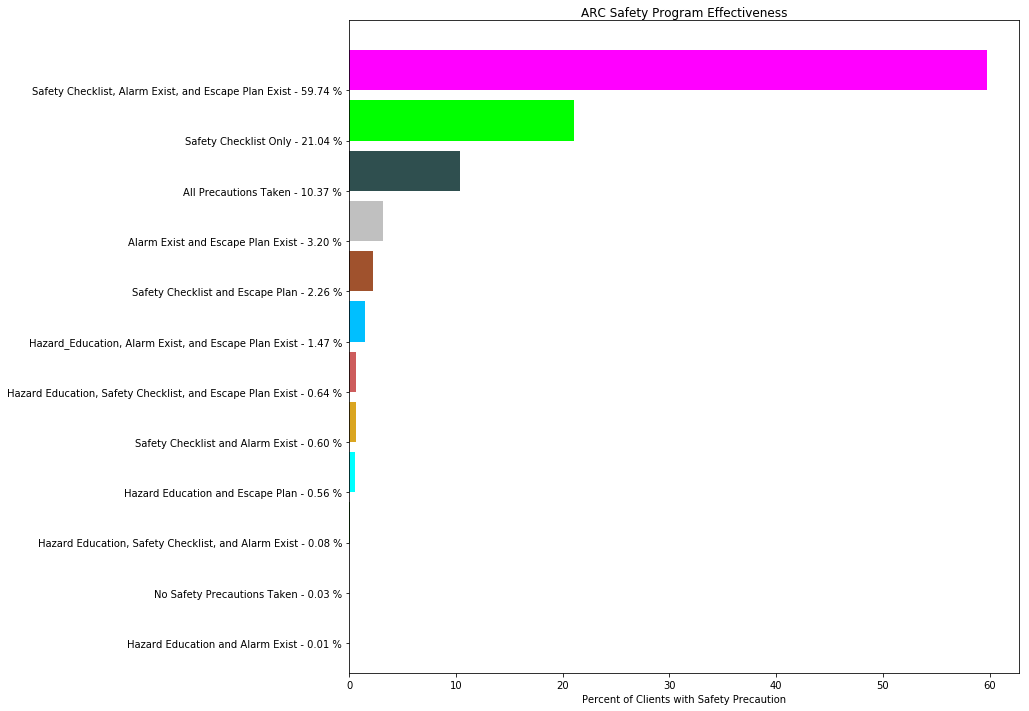

In [21]:
# Creating bar chart
plt.figure(figsize = (12, 12))
ax = plt.subplot(111)
plt.barh(range(len(safety_labels)), prep.percent, color = cs)
plt.xticks(rotation =0)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(prep.preparedness_level, prep.percent)]
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)
plt.xlabel('Percent of Clients with Safety Precaution')
plt.title('ARC Safety Program Effectiveness')
plt.show()

This is a bar chart of the education efforts of the ARC. The descriptions provided are based on whether or not clients have fire alarms, whether or not they have an escape plan, whether or not they have a safety checklist, and whether or not they have provided clients with safety education.

In [22]:
total_clients_served = client_prep.groupby('county').clients_served.sum().reset_index()
print total_clients_served

        county  clients_served
0        BOONE              47
1       BUREAU              73
2         COOK            3748
3       DEKALB              94
4       DUPAGE              69
5       GRUNDY               3
6   JO DAVIESS               1
7         KANE              10
8     KANKAKEE            2243
9      KENDALL               2
10    LA SALLE             659
11        LAKE             384
12         LEE              91
13     MCHENRY               3
14        OGLE               9
15  STEPHENSON              55
16   WHITESIDE             147
17        WILL              52
18   WINNEBAGO             284


In [23]:
# County Preparedness DF
county_prep_i = client_prep.groupby(['county', 'score']).clients_served.sum().reset_index()
county_list = client_prep.county.unique()
county_prep = total_clients_served.merge(county_prep_i, how = 'right', left_on = 'county', right_on = 'county').reset_index()
county_prep['label'] = zip(county_prep['county'], county_prep['score'])
county_prep.columns = ['old_index', 'county', 'total_clients_served', 'score', 'clients_served', 'label']
county_prep['prep_score_percentage'] = (np.array((county_prep.clients_served).astype(float)) / \
                                      np.array((county_prep.total_clients_served).astype(float))) * 100.0

c_score = county_prep.score.unique()
print c_score

[ 3.  4.  0.  1.  2.]


In [24]:
from random import randint
colors = []

for i in range(len(c_score)):
    colors.append('%06X' % randint(0, 0xFFFFFF))
cc = []
c_colors = zip(colors, c_score)

# Associate {score:color} in a dictionary.
# Ask for c_dict["ALSIP"], get "00FF00"
c_dict = {}
for hexcolor, score in c_colors:
    c_dict[score] = hexcolor

# For each index and row in all rows,
for i, row in county_prep.iterrows():
    score = row['score']
    color = '#' + c_dict[score]
    county_prep.set_value(i, 'scorecolor', color)
print county_prep.head(10)
print len(county_prep)

   old_index  county  total_clients_served  score  clients_served  \
0          0   BOONE                    47    3.0              37   
1          1   BOONE                    47    4.0              10   
2          2  BUREAU                    73    3.0              72   
3          3  BUREAU                    73    4.0               1   
4          4    COOK                  3748    0.0               1   
5          5    COOK                  3748    1.0             111   
6          6    COOK                  3748    2.0             236   
7          7    COOK                  3748    3.0            2906   
8          8    COOK                  3748    4.0             494   
9          9  DEKALB                    94    1.0               7   

           label  prep_score_percentage scorecolor  
0   (BOONE, 3.0)              78.723404    #01181D  
1   (BOONE, 4.0)              21.276596    #695085  
2  (BUREAU, 3.0)              98.630137    #01181D  
3  (BUREAU, 4.0)            

C:\Users\debro\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



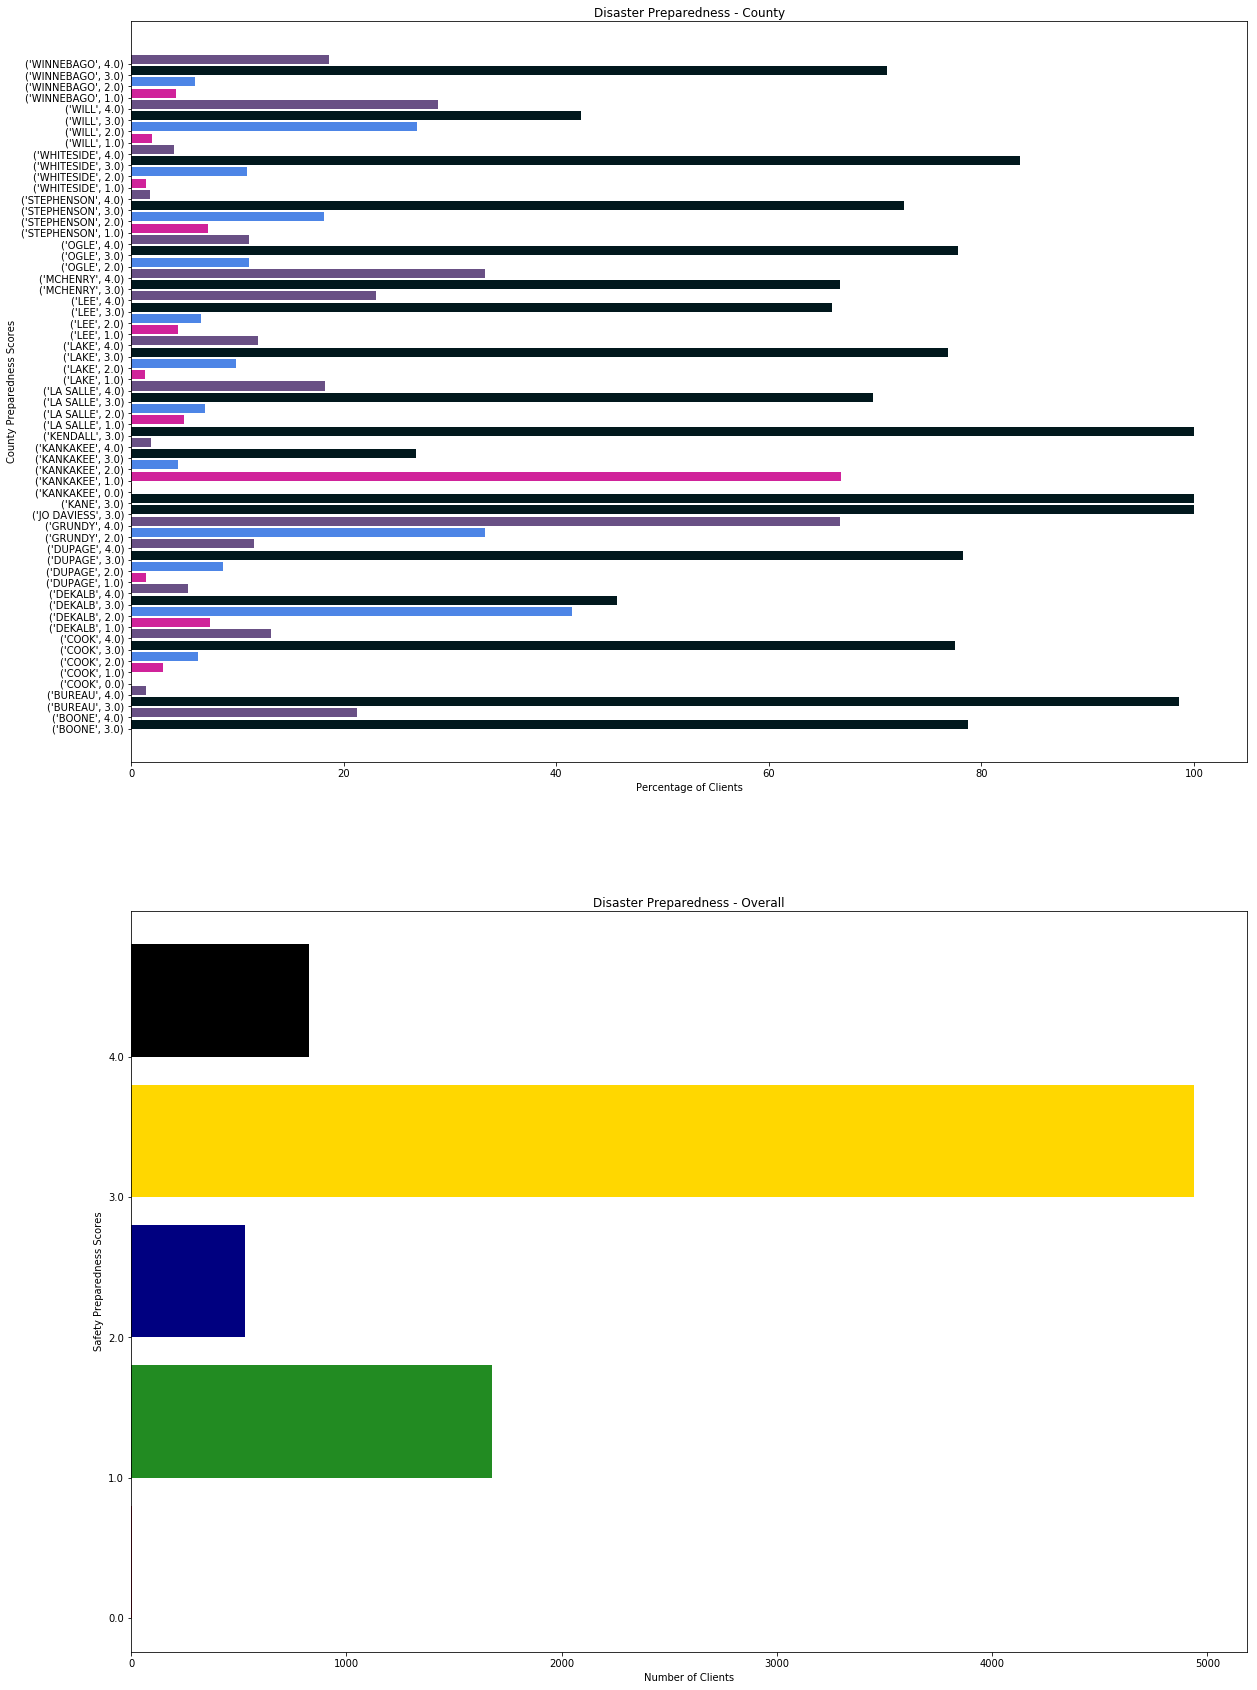

In [25]:
# Creating a bar graphs of percentage and client preparedness scores
county_color = list(county_prep.scorecolor)
plt.figure(figsize = (20, 30))
plt.subplot(211)
plt.barh(range(len(county_prep.label)), county_prep.prep_score_percentage, color = county_prep['scorecolor'])
ax = plt.subplot(211)
ax.set_yticks(range(len(county_prep.label)))
ax.set_yticklabels(county_prep.label)
plt.yticks(rotation = 0)
plt.ylabel('County Preparedness Scores')
plt.xlabel('Percentage of Clients')
plt.title('Disaster Preparedness - County')

# Creating a bar graph of percentage based on scores alone, not grouped by county
prep_score = county_prep.groupby('score').clients_served.sum().reset_index()
plt.subplot(212)
plt.barh(range(len(prep_score.score)), prep_score.clients_served, color = ['crimson', 'forestgreen', 'navy', 'gold', 'k'])
ex = plt.subplot(212)
ex.set_yticks(range(len(prep_score.score)))
ex.set_yticklabels(prep_score.score)
plt.yticks(rotation = 0)
plt.ylabel('Safety Preparedness Scores')
plt.xlabel('Number of Clients')
plt.title('Disaster Preparedness - Overall')
plt.show()

The blue/purple color represents the percent of clients who had a score of 4, gold represents those who had a score of 3, fuchsia/pink represents those who got a score of 2, the light blue represents those who got a 1, and 0 can't be seen here. I will try to resolve my issues with the legend later.

In [26]:
#Split the DataFrame column dat_on_scene based on month and year
arc_response['month'] = arc_response.date.str.split('/').str.get(0)
arc_response['year'] = arc_response.date.str.split('/').str.get(2)

In [27]:
counts = arc_response.groupby(['month', 'year']).case.count().reset_index()
total = counts['case']
ym_response_count = arc_response.groupby(['month', 'year', 'response']).case.count().reset_index()
ym_response_count['month_year'] = ym_response_count['month'].astype(str) + '-' + ym_response_count['year'].astype(str)
ym_response_count.columns = ['month', 'year', 'response', 'count', 'month_year']

In [28]:
rnr_month_counts = pd.pivot_table(ym_response_count, values = ['count'], index = ['month_year', 'month'],\
                              columns = ['response']).reset_index()
sorted_my = ['1-2014', '2-2014', '3-2014', '4-2014', '5-2014', '6-2014', '7-2014', '8-2014', '9-2014',\
             '10-2014', '11-2014', '12-2014', '1-2015', '2-2015', '3-2015', '4-2015', '5-2015', '6-2015', \
             '7-2015', '8-2015', '9-2015', '10-2015', '11-2015', '12-2015', '1-2016', '2-2016', '3-2016',\
             '4-2016', '5-2016', '6-2016', '7-2016', '8-2016', '9-2016', '10-2016', '11-2016', '12-2016', \
             '1-2017', '2-2017', '3-2017', '4-2017', '5-2017', '6-2017', '7-2017', '8-2017', '9-2017', \
             '10-2017', '11-2017', '12-2017', '1-2018', '2-2018', '3-2018', '4-2018', '5-2018', '6-2018',\
             '7-2018', '8-2018']
rnr_month_counts = rnr_month_counts.fillna(0)
rnr_month_counts['total'] = total
rnr_month_counts.month_year = pd.Categorical(rnr_month_counts['month_year'], categories = sorted_my,\
                                            ordered = True)
rnr_month_counts = rnr_month_counts.sort_values(by = 'month_year').reset_index()
rnr_month_counts.columns = ['index', 'month_year', 'month', 'no_response', 'responded', 'total']
print rnr_month_counts

    index month_year month  no_response  responded  total
0       0     1-2014     1          0.0       72.0     72
1      17     2-2014     2          0.0      122.0    122
2      22     3-2014     3          0.0       99.0     99
3      27     4-2014     4          0.0       84.0     84
4      32     5-2014     5          0.0       97.0     97
5      37     6-2014     6          0.0       90.0     90
6      42     7-2014     7          1.0       99.0    100
7      47     8-2014     8          1.0       74.0     75
8      52     9-2014     9          0.0       85.0     85
9       5    10-2014    10          9.0       65.0     74
10      9    11-2014    11          3.0       93.0     96
11     13    12-2014    12         11.0       82.0     93
12      1     1-2015     1         17.0      105.0    122
13     18     2-2015     2         15.0       84.0     99
14     23     3-2015     3         25.0       87.0    112
15     28     4-2015     4         26.0       70.0     96
16     33     

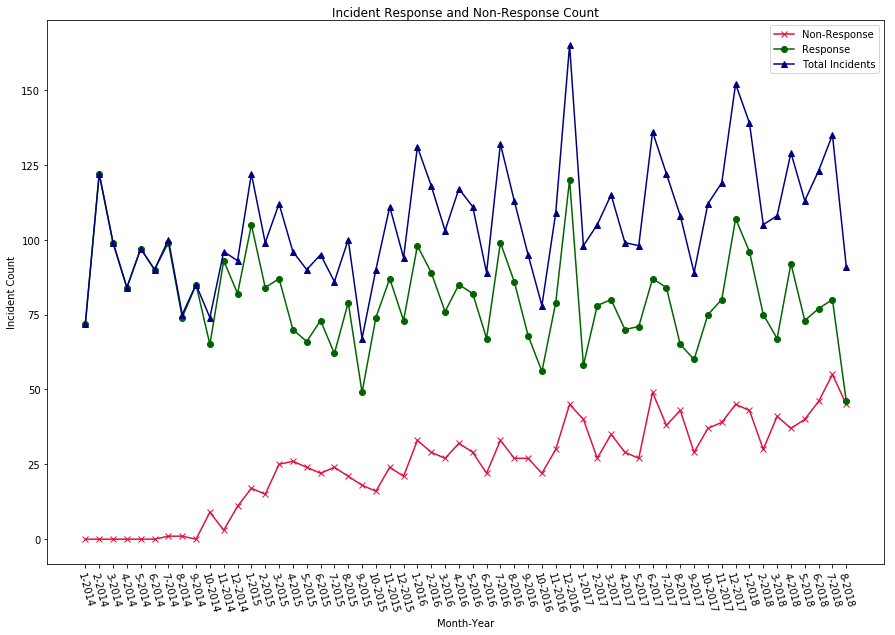

In [29]:
plt.figure(figsize = (15, 10))
plt.plot(range(len(sorted_my)), rnr_month_counts.no_response, marker = 'x', color =  'crimson')
plt.plot(range(len(sorted_my)), rnr_month_counts.responded, marker = 'o', color = 'darkgreen')
plt.plot(range(len(sorted_my)), rnr_month_counts.total, marker = '^', color = 'navy')
ax = plt.subplot()
ax.set_xticks(range(len(sorted_my)))
ax.set_xticklabels(sorted_my)
plt.xticks(rotation = 285)
plt.xlabel('Month-Year')
plt.ylabel('Incident Count')
plt.legend(['Non-Response', 'Response', 'Total Incidents'])
plt.title('Incident Response and Non-Response Count')
plt.show()

`No response`: the ARC did not have a person at the scene of the incident

`Responded`: the ARC did not have a person at the scene of the incident

`total`: the total amount of incidents recorded in `clean_arc_data(1_1_14-8_31_18).csv`

In [30]:
#new_rnr_month_counts = rnr_month_counts[11:]
mrcr = rnr_month_counts.groupby(['month']).responded.sum().reset_index()
mrcnr = rnr_month_counts.groupby(['month']).no_response.sum().reset_index()
mrct = rnr_month_counts.groupby(['month']).total.sum().reset_index()
month_rc = pd.DataFrame()
month_rc['month'] = mrcr['month']
month_rc['responded'] = mrcr['responded']
month_rc['no_response'] = mrcnr['no_response']
month_rc['total'] = mrct['total']
month_rc['percent_response'] = (np.array(month_rc.responded) / np.array(month_rc.total)) * 100.0
sorted_months = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
month_rc.month = pd.Categorical(month_rc.month, categories = sorted_months,\
                                            ordered = True)
month_rc = month_rc.sort_values(by = 'month').reset_index()
print month_rc

    index month  responded  no_response  total  percent_response
0       0     1      429.0        133.0    562         76.334520
1       4     2      448.0        101.0    549         81.602914
2       5     3      409.0        128.0    537         76.163873
3       6     4      401.0        124.0    525         76.380952
4       7     5      389.0        120.0    509         76.424361
5       8     6      394.0        139.0    533         73.921201
6       9     7      424.0        151.0    575         73.739130
7      10     8      350.0        137.0    487         71.868583
8      11     9      262.0         74.0    336         77.976190
9       1    10      270.0         84.0    354         76.271186
10      2    11      339.0         96.0    435         77.931034
11      3    12      382.0        122.0    504         75.793651


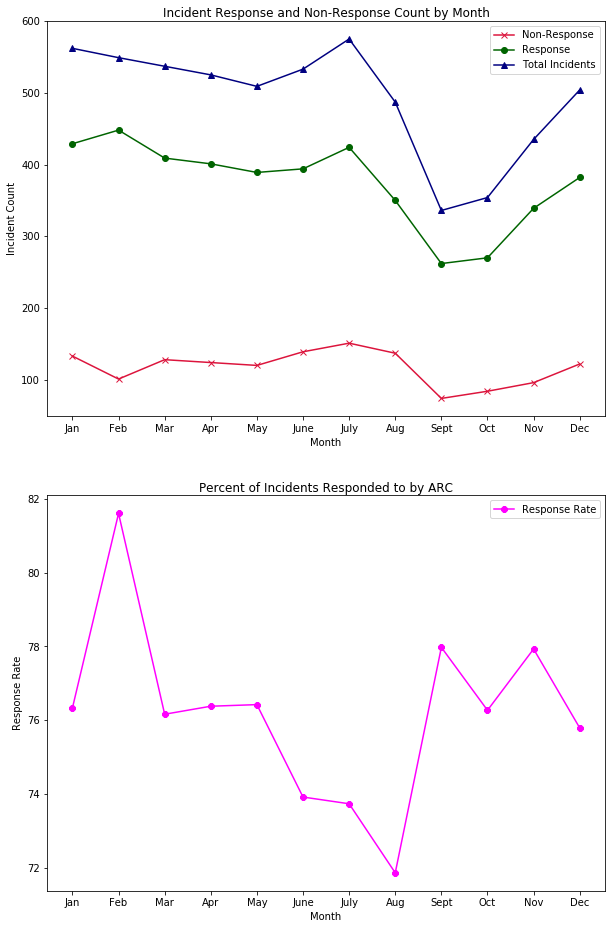

In [31]:
plt.figure(figsize = (10, 16))
plt.subplot(211)
plt.plot(range(len(sorted_months)), month_rc.no_response, marker = 'x', color =  'crimson')
plt.plot(range(len(sorted_months)), month_rc.responded, marker = 'o', color = 'darkgreen')
plt.plot(range(len(sorted_months)), month_rc.total, marker = '^', color = 'navy')
ax1 = plt.subplot(211)
ax1.set_xticks(range(len(sorted_months)))
ax1.set_xticklabels(months)
plt.xticks(rotation = 0)
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.legend(['Non-Response', 'Response', 'Total Incidents'])
plt.title('Incident Response and Non-Response Count by Month')

plt.subplot(212)
plt.plot(range(len(sorted_months)), month_rc.percent_response, marker = '8', color =  'fuchsia')
ax = plt.subplot(212)
ax.set_xticks(range(len(sorted_months)))
ax.set_xticklabels(months)
plt.xticks(rotation = 0)
plt.xlabel('Month')
plt.ylabel('Response Rate')
plt.legend(['Response Rate'])
plt.title('Percent of Incidents Responded to by ARC')
plt.show()

In [32]:
m_cont = [[month_rc.responded], [month_rc.no_response]]
mc_vars = stats.chi2_contingency(m_cont)
mc_vars

(18.659408216160855,
 0.067488003694682538,
 11L,
 array([[[ 427.92312902,  418.0245513 ,  408.88740264,  399.75025398,
           387.5673891 ,  405.84168642,  437.82170674,  370.81594988,
           255.84016255,  269.54588554,  331.22163901,  383.76024382]],
 
        [[ 134.07687098,  130.9754487 ,  128.11259736,  125.24974602,
           121.4326109 ,  127.15831358,  137.17829326,  116.18405012,
            80.15983745,   84.45411446,  103.77836099,  120.23975618]]]))

There is a significant difference between the response rate and non-response rate by month of the year, as we would not reject the assumption that the response rates are equivalent by month at a $\alpha = 0.05$ level.

In [33]:
print clean_arc_data.columns

Index([u'case', u'date', u'incident_number', u'incident_type',
       u'incident_call_type', u'cas_event_number', u'status', u'address',
       u'city', u'state', u'zip', u'county', u'lat', u'lng', u'narrative',
       u'units_destroyed', u'units_major', u'units_minor', u'units_affected',
       u'num_people_injured', u'num_people_hospitalized',
       u'num_people_deceased', u'num_adults', u'num_children', u'num_families',
       u'assistance_given', u'incident_verified', u'dispatch_relayed',
       u'responders_identified', u'dat_on_scene', u'dat_departed_scene'],
      dtype='object')


In [34]:
clean_arc_data['response'] = arc_response.response.apply(lambda x: 1.0 if x == 'Responded' else 0.0)
clean_arc_data.head()

,case,date,incident_number,incident_type,incident_call_type,cas_event_number,status,address,city,state,...,num_adults,num_children,num_families,assistance_given,incident_verified,dispatch_relayed,responders_identified,dat_on_scene,dat_departed_scene,response
0,1,1/1/2014,14-0533,fire,hot,1-1F69GF,closed,1348 W HOWARD ST,CHICAGO,IL,...,10.0,8.0,5.0,NaN,1/1/2014 7:00,1/1/2014 8:00,1/1/2014 8:08,1/1/2014 9:08,1/2/2014 1:45,1.0
1,2,1/1/2014,14-0534,police,hot,NaN,closed,604 SIBLEY AVE.,CALUMET CITY,IL,...,1.0,0.0,1.0,NaN,1/1/2014 14:25,1/1/2014 14:30,1/1/2014 15:20,1/1/2014 16:00,1/1/2014 16:00,1.0
2,3,1/1/2014,14-0535,fire,hot,1-1F6ATB,closed,18405 REGAL ROAD,HOMEWOOD,IL,...,4.0,0.0,1.0,NaN,1/1/2014 16:05,1/1/2014 16:20,12/30/2014 20:13,1/1/2014 17:30,1/1/2014 18:10,1.0
3,4,1/1/2014,14-0536,fire,hot,1-1F6ATV,closed,4323 SOUTH DEARBORN,CHICAGO,IL,...,2.0,0.0,1.0,NaN,1/1/2014 21:10,1/1/2014 21:15,1/1/2014 21:50,1/1/2014 22:59,1/1/2014 23:51,1.0
4,5,1/2/2014,14-0537,fire,hot,1-1F6AT5,closed,1457 WOODBURY CIR,GURNEE,IL,...,0.0,0.0,0.0,NaN,1/2/2014 7:40,1/2/2014 7:45,1/2/2014 8:10,1/2/2014 9:40,1/2/2014 22:15,1.0


In [35]:
# Creating a DataFrame for Logistic. There are a lot of categorical variables so this could be difficult.
lar = clean_arc_data[['assistance_given', 'incident_type', 'incident_call_type', 'city', 'county', 'units_affected',\
                      'num_people_injured', 'num_people_deceased', 'num_adults', 'num_children', 'response']]
lar.county = lar.county.fillna('NONE')
lar.incident_call_type = lar.incident_call_type.fillna('NONE')
lar.city = map(lambda x: x.upper(), lar.city)
lar.county = map(lambda y: y.upper(), lar.county)
lar.incident_call_type = map(lambda z: z.upper(), lar.incident_call_type)
lar.assistance_given = lar.assistance_given.fillna(0)
lar.head()

,assistance_given,incident_type,incident_call_type,city,county,units_affected,num_people_injured,num_people_deceased,num_adults,num_children,response
0,0.0,fire,HOT,CHICAGO,COOK,1.0,0.0,0.0,10.0,8.0,1.0
1,0.0,police,HOT,CALUMET CITY,COOK,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,fire,HOT,HOMEWOOD,COOK,0.0,0.0,0.0,4.0,0.0,1.0
3,0.0,fire,HOT,CHICAGO,COOK,0.0,0.0,0.0,2.0,0.0,1.0
4,0.0,fire,HOT,GURNEE,LAKE,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
print len(lar)
print lar.incident_type.unique()
it = lar.incident_type.unique()
print lar.incident_type.nunique()
print lar.incident_call_type.unique()
ict = lar.incident_call_type.unique()
print lar.incident_call_type.nunique()
print lar.city.nunique()
cities = lar.city.unique()
print lar.county.unique()
counties = lar.county.unique()
print lar.county.nunique()

5984
['fire' 'police' 'flood' 'hazmat' 'transportation' 'search_and_rescue'
 'building_collapse' 'storm' 'explosion' 'exercise' 'vacate' 'tornado'
 'not_eligible_for_services' 'no_response_needed' 'invalid']
15
['HOT' 'NONE' 'COLD']
3
355
['COOK' 'LAKE' 'DUPAGE' 'KANKAKEE' 'KANE' 'WILL' 'MCHENRY' 'NEWTON'
 'DEKALB' 'KENDALL' 'NONE' 'GRUNDY' 'DUBUQUE' 'LASALLE' 'BOONE' 'LEE'
 'WINNEBAGO' 'JO DAVIESS' 'WHITESIDE' 'BUREAU' 'STEPHENSON' 'OGLE'
 'CARROLL' 'PUTNAM' 'LIVINGSTON' 'MARSHALL' 'WALWORTH']
27


In [37]:
lar.incident_type_hot = lar.incident_call_type.apply(lambda x: 1.0 if x == 'HOT' else 0.0)
lar.incident_type_cold = lar.incident_call_type.apply(lambda x: 1.0 if x == 'COLD' else 0.0)
binary_it = pd.get_dummies(lar.incident_type, prefix = 'incident_type')
binary_county = pd.get_dummies(lar.county, prefix = 'county')
print type(binary_county)

<class 'pandas.core.frame.DataFrame'>


C:\Users\debro\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

C:\Users\debro\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [38]:
lar = lar.append(binary_it)
lar = lar.append(binary_county)
lar = lar.fillna(0)
lar.head()

C:\Users\debro\Anaconda2\lib\site-packages\pandas\core\frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,assistance_given,city,county,county_BOONE,county_BUREAU,county_CARROLL,county_COOK,county_DEKALB,county_DUBUQUE,county_DUPAGE,...,incident_type_storm,incident_type_tornado,incident_type_transportation,incident_type_vacate,num_adults,num_children,num_people_deceased,num_people_injured,response,units_affected
0,0.0,CHICAGO,COOK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,8.0,0.0,0.0,1.0,1.0
1,0.0,CALUMET CITY,COOK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,HOMEWOOD,COOK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0
3,0.0,CHICAGO,COOK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
4,0.0,GURNEE,LAKE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
X = []
for i in range(len(lar.columns) - 3):
    col = lar.columns[i + 3]
    X.append(col)
X

['county_BOONE',
 'county_BUREAU',
 'county_CARROLL',
 'county_COOK',
 'county_DEKALB',
 'county_DUBUQUE',
 'county_DUPAGE',
 'county_GRUNDY',
 'county_JO DAVIESS',
 'county_KANE',
 'county_KANKAKEE',
 'county_KENDALL',
 'county_LAKE',
 'county_LASALLE',
 'county_LEE',
 'county_LIVINGSTON',
 'county_MARSHALL',
 'county_MCHENRY',
 'county_NEWTON',
 'county_NONE',
 'county_OGLE',
 'county_PUTNAM',
 'county_STEPHENSON',
 'county_WALWORTH',
 'county_WHITESIDE',
 'county_WILL',
 'county_WINNEBAGO',
 'incident_call_type',
 'incident_type',
 'incident_type_building_collapse',
 'incident_type_exercise',
 'incident_type_explosion',
 'incident_type_fire',
 'incident_type_flood',
 'incident_type_hazmat',
 'incident_type_invalid',
 'incident_type_no_response_needed',
 'incident_type_not_eligible_for_services',
 'incident_type_police',
 'incident_type_search_and_rescue',
 'incident_type_storm',
 'incident_type_tornado',
 'incident_type_transportation',
 'incident_type_vacate',
 'num_adults',
 'num_

In [40]:
#X = lar[X]
#y = lar.assistance_given
#X = sm.add_constant(X)
#ag_mod = sm.OLS(y,X).fit()
#ag_mod.summary()